In [1]:
import os
import cv2
from tensorflow import keras
import numpy as np

In [2]:
file='datasets'
path=os.listdir(file)
categories=[i for i in range(len(path))]
dictonary={i:j for i,j in enumerate(path)}
path

['no', 'pred', 'yes']

In [3]:
data=[]
labels=[]
for category in categories:
    file_path=os.path.join(file,dictonary[category])
    image_path=os.listdir(file_path)
    for i,j in enumerate(image_path):
        images=os.path.join(file_path,image_path[i])
        grey_img=cv2.cvtColor(cv2.imread(images),cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(grey_img,(100,100))
        data.append(resized)
        labels.append(category)

In [4]:
data=[]
labels=[]
dic={"yes":1,"no":0}
for i in path:
    if i=='pred': continue
    file_path=os.path.join(file,i)
    image_path=os.listdir(file_path)
    for j in image_path:
        images=os.path.join(file_path,j)
        grey_img=cv2.cvtColor(cv2.imread(images),cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(grey_img,(100,100))
        data.append(resized)
        labels.append(dic[i])

In [5]:
data=np.array(data,'float32')/255
data=np.array(data,'float32').reshape(data.shape[0],100,100,1)
labels=keras.utils.to_categorical(labels,2)


In [6]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten,Dropout,MaxPooling2D,Convolution2D,Dense

In [8]:
model=Sequential()
model.add(Convolution2D(200,3,activation='relu',input_shape=data.shape[1:]))
model.add(MaxPooling2D((2,2),2))
model.add(Convolution2D(100,3,activation='relu',input_shape=data.shape[1:]))
model.add(MaxPooling2D((2,2),2))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_x,test_x,train_y,test_y=train_test_split(data,labels,test_size=0.3,random_state=4)

In [11]:
train_x.shape

(2100, 100, 100, 1)

In [12]:
test_x.shape

(900, 100, 100, 1)

In [13]:
train_y.shape

(2100, 2)

In [14]:
test_y.shape

(900, 2)

In [15]:
hiss=model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y))

Epoch 1/10
66/66 [==============================] - 106s 2s/step - loss: 0.5304 - accuracy: 0.7467 - val_loss: 0.3830 - val_accuracy: 0.8456
Epoch 2/10
66/66 [==============================] - 96s 1s/step - loss: 0.3139 - accuracy: 0.8667 - val_loss: 0.2465 - val_accuracy: 0.8900
Epoch 3/10
66/66 [==============================] - 95s 1s/step - loss: 0.2169 - accuracy: 0.9152 - val_loss: 0.2067 - val_accuracy: 0.9211
Epoch 4/10
66/66 [==============================] - 95s 1s/step - loss: 0.1431 - accuracy: 0.9448 - val_loss: 0.1381 - val_accuracy: 0.9533
Epoch 5/10
66/66 [==============================] - 101s 2s/step - loss: 0.1083 - accuracy: 0.9638 - val_loss: 0.1250 - val_accuracy: 0.9578
Epoch 6/10
66/66 [==============================] - 90s 1s/step - loss: 0.0653 - accuracy: 0.9786 - val_loss: 0.1249 - val_accuracy: 0.9744
Epoch 7/10
66/66 [==============================] - 94s 1s/step - loss: 0.0436 - accuracy: 0.9876 - val_loss: 0.1299 - val_accuracy: 0.9722
Epoch 8/10
66/66 [

In [16]:
fin_json=model.to_json()
with open ('tumor.json','w') as json_file:
    json_file.write(fin_json)
model.save_weights('Tumor.h5')

In [17]:
from tensorflow.keras.models import model_from_json
model=model_from_json(open('tumor.json','r').read())
model.load_weights('Tumor.h5')

In [18]:
test_x.shape

(900, 100, 100, 1)

In [19]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


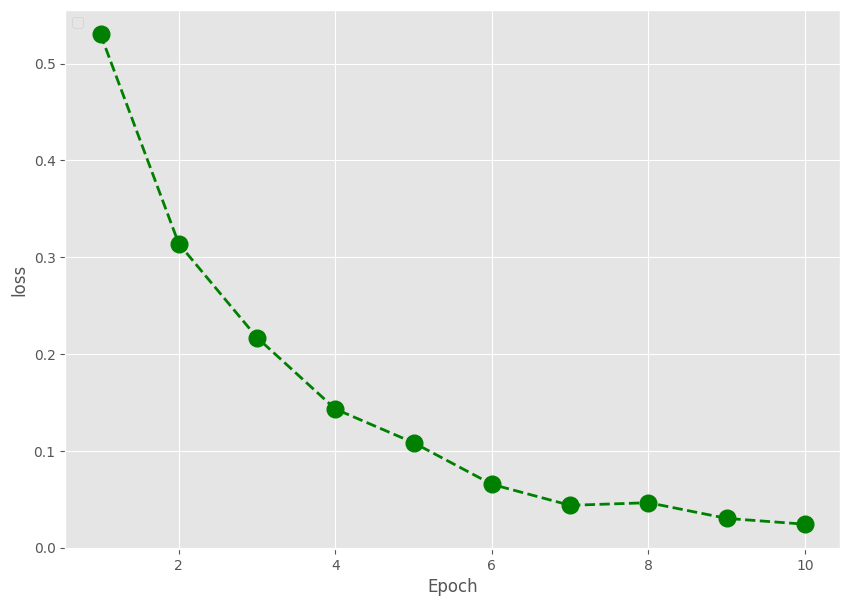

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 
x=[i for i in range(1,11)]
plt.plot(x,hiss.history['loss'],color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.legend(loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 3s 3s/step
digit predicted :0


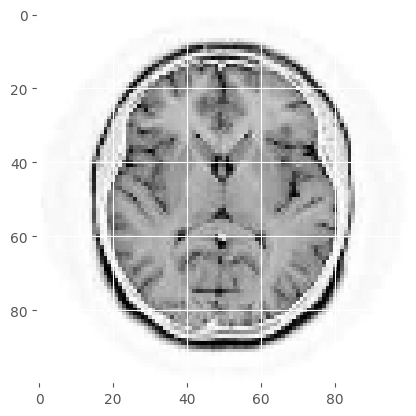

1/1 [==============================] - 3s 3s/step
digit predicted :0


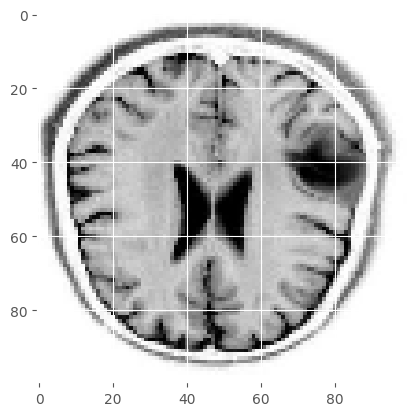

1/1 [==============================] - 1s 858ms/step
digit predicted :0


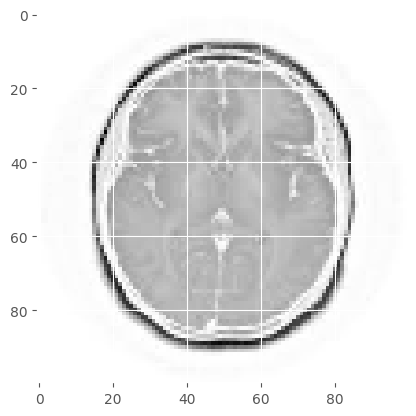

1/1 [==============================] - 1s 1s/step
digit predicted :0


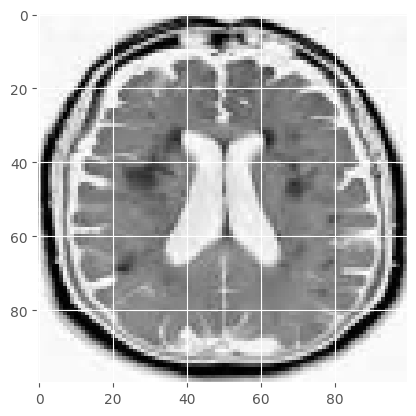

1/1 [==============================] - 1s 1s/step
digit predicted :0


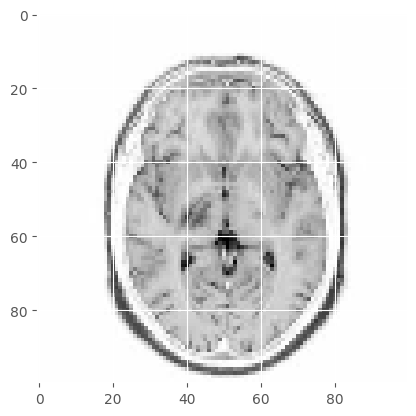

1/1 [==============================] - 1s 960ms/step
digit predicted :1


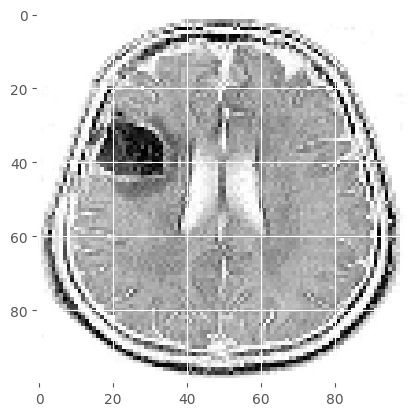

1/1 [==============================] - 1s 1s/step
digit predicted :0


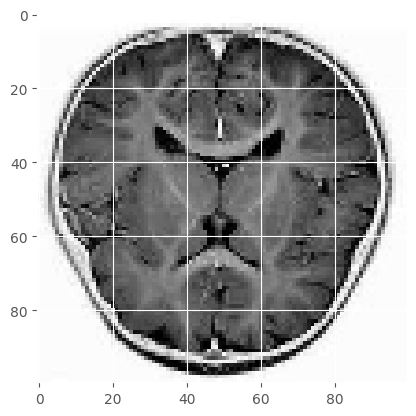

1/1 [==============================] - 1s 935ms/step
digit predicted :0


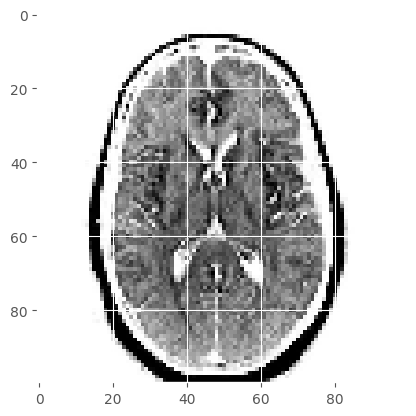

1/1 [==============================] - 1s 935ms/step
digit predicted :0


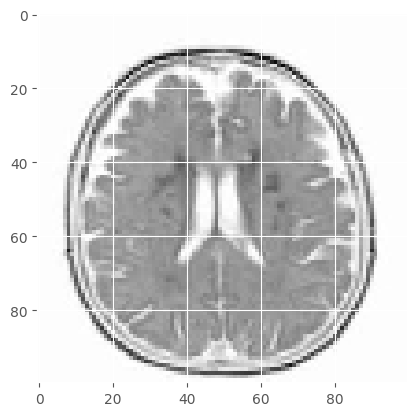

1/1 [==============================] - 1s 1s/step
digit predicted :1


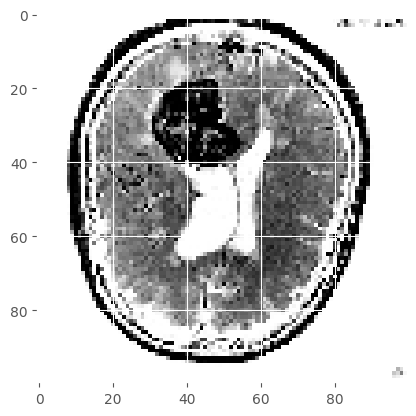

1/1 [==============================] - 1s 962ms/step
digit predicted :0


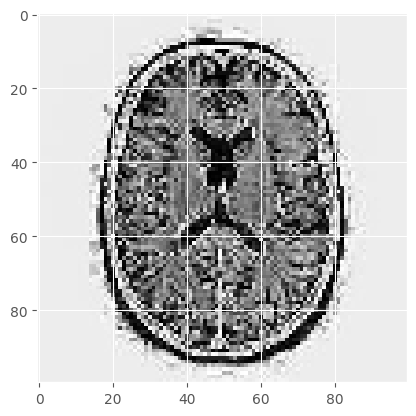

In [22]:
for i in range(200,211):
    sample=test_x[i].reshape(1,100,100,1)
    print(f'digit predicted :{np.argmax(model.predict(sample))}')
    plt.imshow(test_x[i].reshape(100,100),cmap=plt.cm.gray_r)
    plt.show()